In [1]:
import math
import os
import random
import shutil
import pickle
import matplotlib.colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
# import tensorflow as tf
# import shap
import sys
import time
import sqlite3

from simple_colors import *
from scipy.stats import ttest_ind
from scipy.special import softmax
from sklearn.metrics import accuracy_score
# from tensorflow import keras
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras import layers
# from tensorflow.keras.preprocessing.text import Tokenizer

SEED_VALUE = 11
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
# tf.random.set_seed(SEED_VALUE)
warnings.filterwarnings('ignore')
os.chdir(os.getcwd())

### Proposed method

In [2]:
# #Add a DNN model block
# from IPython.display import Image
# Image(filename='method.png')

### Dataset

In [3]:
# #provide examples for each distribution
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from matplotlib import rcParams

# # figure size in inches optional
# rcParams['figure.figsize'] = 20 ,15

# # read images
# img_A = mpimg.imread('dataset.png')
# img_B = mpimg.imread('flowchart.png')

# # display images
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(img_A)
# ax[0].axis('off')
# ax[1].imshow(img_B)
# ax[1].axis('off')

### Metrics

In [4]:
# from IPython.display import Image
# Image(filename='metrics.png', width=1000)

### Structure of results
#### Proposing the best knowledge dissemination method for each DNN model to construct a sentiment classifier

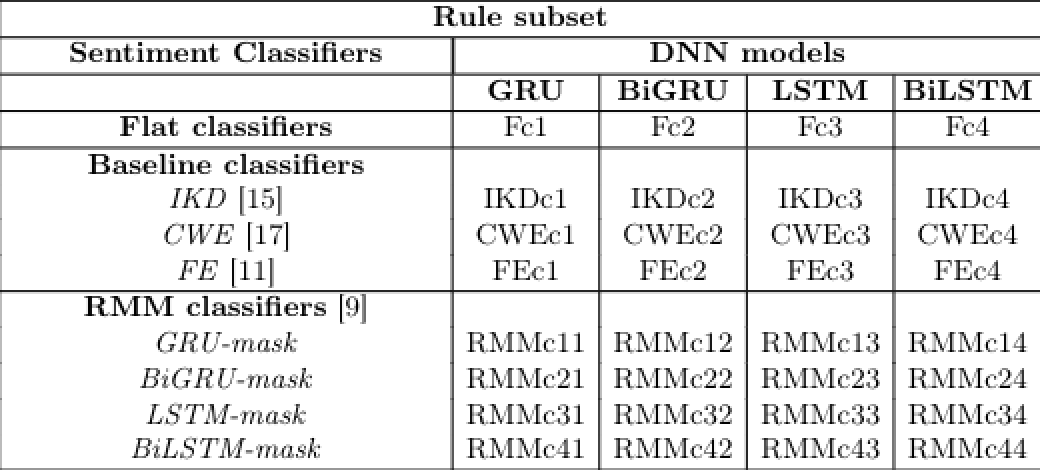

In [148]:
from IPython.display import Image
Image(filename='analysis/structure_of_results.png', width=500)
#improve the quality of image

#### Schema of the database as per the results

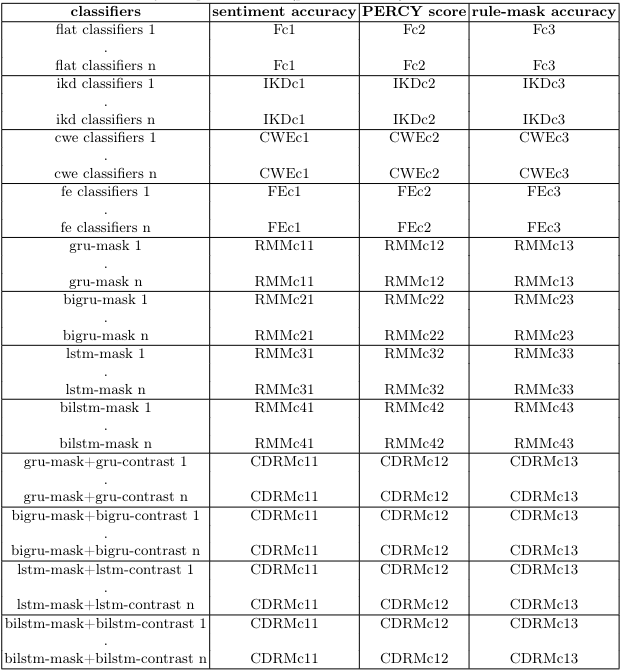

In [146]:
#schema
from IPython.display import Image
Image(filename='analysis/schema.png')
#improve the quality of image

#### Creating the database as per the schema

In [21]:
##TODO: Avoid loading the tensorflow to make this code run quicker

import sqlite3

from analysis.create_database import create_database

#Replace classifiers with <None> value
input_dict = {
            "flat_classifiers":FLAT_CLASSIFIERS,
            "ikd":None,
            "cwe":None,
            "fe":None,
            "mask_models":None
             }
create_database(input_dict).creating_database_one_rule()

  0%|                                                                                                                                                                                                                                                                                                   | 0/7 [00:00<?, ?it/s]

mlp_1e5_learning_rate_200_epochs


 14%|████████████████████████████████████████▍                                                                                                                                                                                                                                                  | 1/7 [00:18<01:53, 18.96s/it]

cnn_1e5_learning_rate_200_epochs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:37<00:00,  5.41s/it]

lstm_1e5_learning_rate_200_epochs already exists in the database

bilstm_1e5_learning_rate_200_epochs already exists in the database

gru_1e5_learning_rate_200_epochs already exists in the database

bigru_1e5_learning_rate_200_epochs already exists in the database

transformer_1e5_learning_rate_200_epochs already exists in the database




Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 136, in creating_database_one_rule
    ikd = [f.replace('.h5', '') for f in listdir("IKD/assets/trained_models/") if isfile(join("IKD/assets/trained_models/", f))]
FileNotFoundError: [Errno 2] No such file or directory: 'IKD/assets/trained_models/'
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 185, in creating_database_one_rule
    cwe = [f.replace('.h5', '') for f in listdir("CWE/assets/trained_models/") if isfile(join("CWE/assets/trained_models/", f))]
FileNotFoundError: [Errno 2] No such file or directory: 'CWE/assets/trained_models/'
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 234, in creating_database_one_rule
    fe = [f.replace('.h5', '') for f in listdir("base_model_FE/asse

#### Query distrubitions of the metrics from the database

In [22]:
#### DNN models ####
DNN_MODELS = [
             "mlp",
             "cnn",
             "lstm", 
             "bilstm", 
             "gru", 
             "bigru",
             "transformer"
             ]

##### Sentiment classifiers #####
#flat classifiers
FLAT_CLASSIFIERS = [
#              "mlp",
# #              "mlp_1e5_learning_rate",
#              "cnn",
#              "lstm", 
#              "bilstm", 
#              "gru", 
#              "bigru",
# #             "transformer",
# #             "transformer_higher_learning_rate",
# #             "transformer_lower_learning_rate",
# #             "transformer_1e6_learning_rate",
#               "transformer_1e5_learning_rate_200_epochs"
             "mlp_1e5_learning_rate_200_epochs",
             "cnn_1e5_learning_rate_200_epochs",
             "lstm_1e5_learning_rate_200_epochs",
             "bilstm_1e5_learning_rate_200_epochs",
             "gru_1e5_learning_rate_200_epochs",
             "bigru_1e5_learning_rate_200_epochs",
             "transformer_1e5_learning_rate_200_epochs"
             ]

#baseline classifiers
CWE = [
       "rnn_model-ELMO-128_HIDDEN_UNITS_CLASSIFIER", 
       "birnn_model-ELMO-128_HIDDEN_UNITS_CLASSIFIER",
       "gru_model-ELMO", 
       "bigru_model-ELMO-128_HIDDEN_UNITS_CLASSIFIER", 
       "lstm_model-ELMO-128_HIDDEN_UNITS_CLASSIFIER",        
       "bilstm_model-ELMO-128_HIDDEN_UNITS_CLASSIFIER"
      ]
IKD = [
       "rnn_model-IKD-PAD_MASK_ZERO", 
       "birnn_model-IKD-PAD_MASK_ZERO",
       "gru_model-IKD-PAD_MASK_ZERO",
       "bigru_model-IKD-PAD_MASK_ZERO", 
       "lstm_model-IKD-PAD_MASK_ZERO", 
       "bilstm_model-IKD-PAD_MASK_ZERO"
      ]
FE = [
      "rnn_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER",
      "birnn_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER",
      "gru_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "bigru_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "lstm_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "bilstm_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER"
     ]

#RMM configurations
mask_models = []
masks = [
        "rnn", 
        "birnn", 
        "gru", 
        "bigru", 
        "lstm", 
        "bilstm"
        ]    
for mask in masks:
    MODELS = [
              "rnn_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER",
              "birnn_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER",
              "gru_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "bigru_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "lstm_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "bilstm_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER"
             ]
#     MODELS = [
#               "rnn_"+mask+"_mask_model-CLIPPED_MASK",
#               "birnn_"+mask+"_mask_model-CLIPPED_MASK",
#               "gru_"+mask+"_mask_model-CLIPPED_MASK", 
#               "bigru_"+mask+"_mask_model-CLIPPED_MASK", 
#               "lstm_"+mask+"_mask_model-CLIPPED_MASK", 
#               "bilstm_"+mask+"_mask_model-CLIPPED_MASK"
#              ]
    mask_models.append(MODELS)

In [23]:
##TO-DO: it should return the classifiers corresponding to the values as well

from analysis.query_distributions import query_distributions

#Replace classifiers with <None> value
input_dict = {
            "flat_classifiers":FLAT_CLASSIFIERS,
            "ikd":None,
            "cwe":None,
            "fe":None,
            "mask_models":None
             }
sentiment_accuracy_dists, sentiment_accuracy_vals, percy_score_dists, percy_score_vals = query_distributions(input_dict).query()

### Analysis

#### Tabular visualisation of the results as per their structure

In [24]:
from analysis.tabular_visualisation import create_tabular_visualisation

#creating the first column
data = {
"Sentiment classifiers":[
"Flat classifiers", 
#     "IKD (2016)", 
#     "CWE (2018)", 
#     "FE (2021)",
#     "RNN-mask", "BiRNN-mask", "GRU-mask", "BiGRU-mask", "LSTM-mask", "BiLSTM-mask"
]
}

dataframe_accuracy = create_tabular_visualisation(data, DNN_MODELS, "sentiment_accuracy", 
                                                  sentiment_accuracy_vals, sentiment_accuracy_dists)
dataframe_percy = create_tabular_visualisation(data, DNN_MODELS, "percy_score", 
                                               percy_score_vals, percy_score_dists)

/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/tabular_visualisation.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dataframe = dataframe.style.applymap(highlight, subset=pd.IndexSlice[:, [dnn_models[0]]], column_name=dnn_models[0], vals_column_dict=vals_column_dict)\
/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/tabular_visualisation.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dataframe = dataframe.style.applymap(highlight, subset=pd.IndexSlice[:, [dnn_models[0]]], column_name=dnn_models[0], vals_column_dict=vals_column_dict)\


In [25]:
#Provide a small description of the tables
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>']))):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        if ' \n ' in title:
            titles = title.split(' \n ')
            for title in titles:
                html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        else:
            html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
display_side_by_side(dataframe_accuracy, dataframe_percy,
                     titles=['Sentiment accuracy', 'PERCY score'])

,Sentiment classifiers,mlp,cnn,lstm,bilstm,gru,bigru,transformer
0,Flat classifiers,0.832247,0.933425,0.923521,0.924273,0.929664,0.935055,0.867854
,Sentiment classifiers,mlp,cnn,lstm,bilstm,gru,bigru,transformer
0,Flat classifiers,0.037781,0.077344,0.063732,0.078743,0.092100,0.081287,0.048467


#### Bar plots visualisation of the results as per their structure

#### Convergence plots

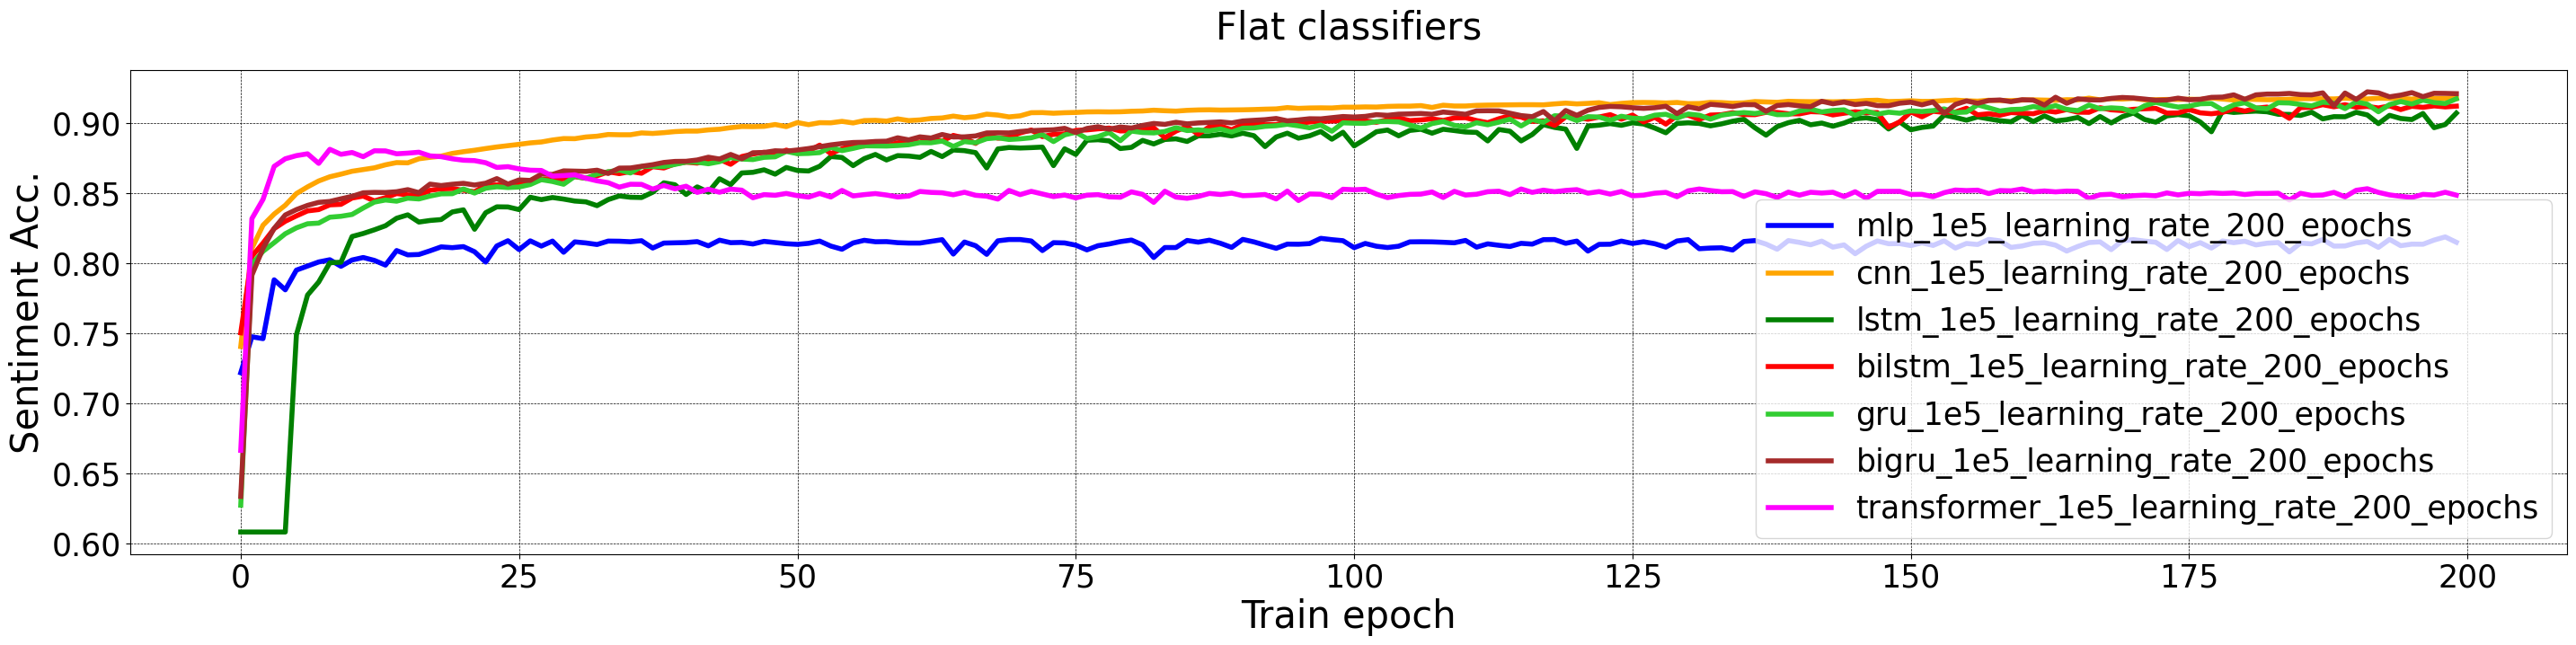

In [58]:
##### Convergence plots #####
import matplotlib.pyplot as plt
import pickle

#Smoothening
def smooth(scalars, weight = 0.0):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed

#Graph parameters
params = {'figure.titlesize':30,
          'legend.fontsize': 25,
          'font.size': 25,
          'axes.labelsize': 30,
          'axes.titlesize':30,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'axes.titlepad': 25,
          'axes.axisbelow': True}
plt.rcParams.update(params)

#Models
fig_rmm, ax_rmm = plt.subplots(figsize=(35, 7))
ax_rmm.grid(color = 'black', linestyle = '--', linewidth = 0.5)
colors = ["blue", "orange", "green", "red", "limegreen", "brown", "magenta", "red", "limegreen", "brown", "magenta"]
for index_2, model in enumerate(FLAT_CLASSIFIERS):
    color = colors[index_2]
    with open("flat_classifiers/assets/training_history/"+model+".pickle", 'rb') as handle:
        history = pickle.load(handle)
    history['test_dataset_one_rule_accuracy_smoothed'] = smooth(history['test_dataset_one_rule_accuracy'])
    ax_rmm.plot(history['test_dataset_one_rule_accuracy_smoothed'], color=color, linewidth=4, label=model)
ax_rmm.set_title('Flat classifiers')
ax_rmm.set_xlabel('Train epoch')
ax_rmm.set_ylabel('Sentiment Acc.')
ax_rmm.legend(loc="lower right")

# #RMM configurations
# fig_rmm, ax_rmm = plt.subplots(figsize=(35, 7))
# ax_rmm.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# for index, model in enumerate(FLAT_CLASSIFIERS):
#     colors = ["blue", "orange", "green", "red", "limegreen", "brown", "magenta", "grey"]
#     for index_2, model in enumerate(mask_model):
#         color = colors[index_2]
#         with open("mask_model/assets/training_history/"+model+".pickle", 'rb') as handle:
#             history = pickle.load(handle)
#         history['test_dataset_one_rule_mask_accuracy_smoothed'] = smooth(history['test_dataset_one_rule_mask_accuracy'])
#         ax_rmm.plot(history['test_dataset_one_rule_mask_accuracy_smoothed'], color=color, linewidth=4)
# ax_rmm.set_title('RMM classifiers')
# ax_rmm.set_xlabel('Train epoch')
# ax_rmm.set_ylabel('Rule-mask Acc.')

### End ###

In [56]:
with open("flat_classifiers/assets/training_history/transformer_1e5_learning_rate_200_epochs.pickle", 'rb') as handle:
    history = pickle.load(handle)
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'test_dataset_loss', 'test_dataset_accuracy', 'test_dataset_no_rule_loss', 'test_dataset_no_rule_accuracy', 'test_dataset_one_rule_loss', 'test_dataset_one_rule_accuracy', 'test_dataset_one_rule_contrast_loss', 'test_dataset_one_rule_contrast_accuracy', 'test_dataset_one_rule_no_contrast_loss', 'test_dataset_one_rule_no_contrast_accuracy', 'test_dataset_a_but_b_loss', 'test_dataset_a_but_b_accuracy', 'test_dataset_a_but_b_contrast_loss', 'test_dataset_a_but_b_contrast_accuracy', 'test_dataset_a_but_b_no_contrast_loss', 'test_dataset_a_but_b_no_contrast_accuracy', 'test_dataset_a_yet_b_loss', 'test_dataset_a_yet_b_accuracy', 'test_dataset_a_yet_b_contrast_loss', 'test_dataset_a_yet_b_contrast_accuracy', 'test_dataset_a_yet_b_no_contrast_loss', 'test_dataset_a_yet_b_no_contrast_accuracy', 'test_dataset_a_though_b_loss', 'test_dataset_a_though_b_accuracy', 'test_dataset_a_though_b_contrast_loss', 'test_dataset_a_though_b_contrast_

#### Tests for the scripts used in this notebook ####

In [98]:
import tensorflow as tf

# Compute some values using a Tensor
c = tf.constant([[0.3, 0.7], [0.1, 0.9], [0.5, 0.5]])
print(c)

In [7]:
import sqlite3

con = sqlite3.connect("one_rule.db")
cur = con.cursor()
columns = """(classifiers, 
            sentiment_accuracy, 
            percy_score, percy_score_same_cond_no_cont, percy_score_without_pval, percy_score_cikm2021,
            rule_mask_accuracy_vector_comparison, rule_mask_accuracy_bitwise_comparison, UNIQUE(classifiers))
          """
query = "CREATE TABLE IF NOT EXISTS one_rule"+columns
cur.execute(query)

for model in BASE_MODELS:
    print(model)
    cur.execute("SELECT * FROM one_rule WHERE classifiers = ?", (model,))
    data=cur.fetchone()
    if data is None:
        print('There is no component named %s'%model)
    else:
        print('Component %s found with rowid %s'%(model,data[0]))

rnn_model
Component rnn_model found with rowid rnn_model
birnn_model_256_hidden_units
Component birnn_model_256_hidden_units found with rowid birnn_model_256_hidden_units
gru_model-128_HIDDEN_UNITS
Component gru_model-128_HIDDEN_UNITS found with rowid gru_model-128_HIDDEN_UNITS
bigru_model-128_HIDDEN_UNITS
Component bigru_model-128_HIDDEN_UNITS found with rowid bigru_model-128_HIDDEN_UNITS
lstm_model-128_HIDDEN_UNITS
Component lstm_model-128_HIDDEN_UNITS found with rowid lstm_model-128_HIDDEN_UNITS
bilstm_model-128_HIDDEN_UNITS
Component bilstm_model-128_HIDDEN_UNITS found with rowid bilstm_model-128_HIDDEN_UNITS


In [66]:
sentence = """
@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn't matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours despite the rubbish result 👏👏👏
"""

In [67]:
# from nltk.tokenize import TweetTokenizer

# tokenizer = TweetTokenizer()
# tokenized_sentence = tokenizer.tokenize(sentence)
# tokenized_sentence

In [68]:
# from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(tokenized_sentence)

In [69]:
sentence

'\n@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn\'t matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours despite the rubbish result 👏👏👏\n'

In [70]:
tokenized_sentence = sentence.lower().split()
tokenized_sentence

['@bbcburnsy',
 '@swanster66',
 '@mattdeanbbc',
 '@humbersidesport',
 'no',
 'crowd',
 'noise',
 "didn't",
 'matter',
 '-',
 'listening',
 'to',
 'you',
 'two',
 'today',
 'felt',
 '"normal"',
 'and',
 'sounded',
 'normal,',
 'with',
 'two',
 'old',
 'friends',
 'back',
 'on',
 'saturday',
 'sport',
 'once',
 'more',
 'gave',
 'a',
 'covid',
 'release',
 'just',
 'for',
 'a',
 'couple',
 'of',
 'hours',
 'despite',
 'the',
 'rubbish',
 'result',
 '👏👏👏']

In [71]:
tokenized_sentence_upper = sentence.split()
tokenized_sentence_upper

['@bbcburnsy',
 '@swanster66',
 '@mattdeanbbc',
 '@HumbersideSport',
 'No',
 'crowd',
 'noise',
 "didn't",
 'matter',
 '-',
 'listening',
 'to',
 'you',
 'two',
 'today',
 'felt',
 '"normal"',
 'and',
 'sounded',
 'normal,',
 'with',
 'two',
 'old',
 'friends',
 'back',
 'on',
 'Saturday',
 'Sport',
 'once',
 'more',
 'gave',
 'a',
 'Covid',
 'release',
 'just',
 'for',
 'a',
 'couple',
 'of',
 'hours',
 'despite',
 'the',
 'rubbish',
 'result',
 '👏👏👏']

In [72]:
a_clause = tokenized_sentence_upper[:tokenized_sentence.index("despite")]
a_clause = ' '.join(a_clause)
b_clause = tokenized_sentence_upper[tokenized_sentence.index("despite")+1:]
b_clause = ' '.join(b_clause)
print(a_clause)
print(b_clause)

@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn't matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours
the rubbish result 👏👏👏


In [73]:
re_sentence = ' '.join(tokenized_sentence)
re_sentence = re_sentence.strip().replace('  ', ' ')
re_sentence

'@bbcburnsy @swanster66 @mattdeanbbc @humbersidesport no crowd noise didn\'t matter - listening to you two today felt "normal" and sounded normal, with two old friends back on saturday sport once more gave a covid release just for a couple of hours despite the rubbish result 👏👏👏'

In [145]:
from nltk.tokenize import TweetTokenizer

def conjunction_analysis(tweet):

    #lowercase and tokenize the sentence
    tokenized_sentence = tweet.lower().split()
    tokenized_sentence_orig_case = tweet.split()

    # tweet_lower_case = tweet.lower()
    # tokenizer = TweetTokenizer()
    # tokenized_sentence = tokenizer.tokenize(tweet_lower_case)

    #output
    rule_structure = None
    rule_conjunct = None
    a_conjunct = None
    b_conjunct = None

    #markers list
    marker_list = [
                    "but",
                    "yet",
                    "though",
                    "while",
                    "however",
                    "despite",
                    "though",
                    "although",
                    "nevertheless",
                    "otherwise",
                    "still",
                    "nonetheless",
                    "till",
                    "until",
                    "in spite"
                  ]

    # A-but-B
    word_list = marker_list.copy()
    word_list.remove("but")
    if ('but' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('but') != 0 and tokenized_sentence.index('but') != -1 and tokenized_sentence.count('but') == 1): # Check if the sentence contains A-but-B structure
            rule_structure = "a-but-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("but")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("but")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')
    
    # A-while-B
    word_list = marker_list.copy()
    word_list.remove("while")
    if ('while' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('while') != 0 and tokenized_sentence.index('while') != -1 and tokenized_sentence.count('while') == 1):
            rule_structure = "a-while-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("while")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("while")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-yet-B
    word_list = marker_list.copy()
    word_list.remove("yet")
    if ('yet' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('yet') != 0 and tokenized_sentence.index('yet') != -1 and tokenized_sentence.count('yet') == 1): # Check if the sentence contains A-yet-B structure
            rule_structure = "a-yet-b"
            rule_conjunct = "b"   

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("yet")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("yet")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-however-B
    word_list = marker_list.copy()
    word_list.remove("however")
    if ('however' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('however') != 0 and tokenized_sentence.index('however') != -1 and tokenized_sentence.count('however') == 1):
            rule_structure = "a-however-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("however")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("however")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-despite-B
    word_list = marker_list.copy()
    word_list.remove("despite")
    if ('despite' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('despite') != 0 and tokenized_sentence.index('despite') != -1 and tokenized_sentence.count('despite') == 1):
            rule_structure = "a-despite-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("despite")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("despite")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-although-B
    word_list = marker_list.copy()
    word_list.remove("although")
    if ('although' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('although') != 0 and tokenized_sentence.index('although') != -1 and tokenized_sentence.count('although') == 1):
            rule_structure = "a-although-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("although")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("although")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-though-B
    word_list = marker_list.copy()
    word_list.remove("though")
    if ('though' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('though') != 0 and tokenized_sentence.index('though') != -1 and tokenized_sentence.count('though') == 1):
            rule_structure = "a-though-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("though")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("though")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-nevertheless-B
    word_list = marker_list.copy()
    word_list.remove("nevertheless")
    if ('nevertheless' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('nevertheless') != 0 and tokenized_sentence.index('nevertheless') != -1 and tokenized_sentence.count('nevertheless') == 1):
            rule_structure = "a-nevertheless-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("nevertheless")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("nevertheless")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-otherwise-B
    word_list = marker_list.copy()
    word_list.remove("otherwise")
    if ('otherwise' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('otherwise') != 0 and tokenized_sentence.index('otherwise') != -1 and tokenized_sentence.count('otherwise') == 1):
            rule_structure = "a-otherwise-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("otherwise")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("otherwise")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-still-B
    word_list = marker_list.copy()
    word_list.remove("still")
    if ('still' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('still') != 0 and tokenized_sentence.index('still') != -1 and tokenized_sentence.count('still') == 1):
            rule_structure = "a-still-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("still")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("still")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-nonetheless-B
    word_list = marker_list.copy()
    word_list.remove("nonetheless")
    if ('nonetheless' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('nonetheless') != 0 and tokenized_sentence.index('nonetheless') != -1 and tokenized_sentence.count('nonetheless') == 1):
            rule_structure = "a-nonetheless-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("nonetheless")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("nonetheless")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-till-B
    word_list = marker_list.copy()
    word_list.remove("till")
    if ('till' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('till') != 0 and tokenized_sentence.index('till') != -1 and tokenized_sentence.count('till') == 1):
            rule_structure = "a-till-a"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("till")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("till")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')
    
    # A-until-B
    word_list = marker_list.copy()
    word_list.remove("until")
    if ('until' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('until') != 0 and tokenized_sentence.index('until') != -1 and tokenized_sentence.count('until') == 1):
            rule_structure = "a-until-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("until")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("until")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-in spite-B
    word_list = marker_list.copy()
    word_list.remove("in spite")
    if ('in spite' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('in spite') != 0 and tokenized_sentence.index('in spite') != -1 and tokenized_sentence.count('in spite') == 1):
            rule_structure = "a-in spite-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("in spite")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("in spite")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    return rule_structure, rule_conjunct, a_conjunct, b_conjunct

import preprocessor as p
p.set_options(p.OPT.EMOJI, p.OPT.SMILEY)
tweet = """
        This thing my mum is watching about the corona virus is actually making me really upset. Like what if my parents die!! I was calm until she started watching it. I feel like crying now 😭😭
        """
cleaned_tweet = p.clean(tweet)
rule_structure, rule_conjunct, clause_A, clause_B = conjunction_analysis(cleaned_tweet)
print(rule_structure)
print(rule_conjunct)
print(clause_A)
print(clause_B)

a-until-b
a
This thing my mum is watching about the corona virus is actually making me really upset. Like what if my parents die!! I was calm
she started watching it. I feel like crying now


In [38]:
import pickle

for counter in (1, 501):
    counters = pickle.load(open("construct_dataset/assets/processed_dataset/without_rule_label_consistency_check_corona_tweets_1_counters.pickle", "rb"))

dict_keys(['tweets_in_corpus', 'tweets_in_distribution', 'consistency_check', 'vader_accuracy', 'roberta_accuracy', 'counter_blue_area_positive', 'counter_blue_area_negative', 'counter_no_rule_rule_syntactic_structure', 'counter_positive_a_but_b_contrast', 'counter_negative_a_but_b_contrast', 'counter_positive_a_but_b_no_contrast', 'counter_negative_a_but_b_no_contrast', 'counter_positive_a_yet_b_contrast', 'counter_negative_a_yet_b_contrast', 'counter_positive_a_yet_b_no_contrast', 'counter_negative_a_yet_b_no_contrast', 'counter_positive_a_however_b_contrast', 'counter_negative_a_however_b_contrast', 'counter_positive_a_however_b_no_contrast', 'counter_negative_a_however_b_no_contrast', 'counter_positive_a_despite_b_contrast', 'counter_negative_a_despite_b_contrast', 'counter_positive_a_despite_b_no_contrast', 'counter_negative_a_despite_b_no_contrast', 'counter_positive_a_although_b_contrast', 'counter_negative_a_although_b_contrast', 'counter_positive_a_although_b_no_contrast', 'co

In [47]:
import pickle

counters_init = {
                "tweets_in_corpus":0,
                "tweets_in_distribution":0,

                "consistency_check":[],
                "vader_accuracy":[],
                "roberta_accuracy":[],

                "counter_blue_area_positive":0,
                "counter_blue_area_negative":0,

                "counter_no_rule_rule_syntactic_structure":0,

                "counter_positive_a_but_b_contrast":0,
                "counter_negative_a_but_b_contrast":0,
                "counter_positive_a_but_b_no_contrast":0,
                "counter_negative_a_but_b_no_contrast":0,

                "counter_positive_a_yet_b_contrast":0,
                "counter_negative_a_yet_b_contrast":0,
                "counter_positive_a_yet_b_no_contrast":0,
                "counter_negative_a_yet_b_no_contrast":0,

                "counter_positive_a_however_b_contrast":0,
                "counter_negative_a_however_b_contrast":0,
                "counter_positive_a_however_b_no_contrast":0,
                "counter_negative_a_however_b_no_contrast":0,

                "counter_positive_a_despite_b_contrast":0,
                "counter_negative_a_despite_b_contrast":0,
                "counter_positive_a_despite_b_no_contrast":0,
                "counter_negative_a_despite_b_no_contrast":0,

                "counter_positive_a_although_b_contrast":0,
                "counter_negative_a_although_b_contrast":0,
                "counter_positive_a_although_b_no_contrast":0,
                "counter_negative_a_although_b_no_contrast":0,

                "counter_positive_a_though_b_contrast":0,
                "counter_negative_a_though_b_contrast":0,
                "counter_positive_a_though_b_no_contrast":0,
                "counter_negative_a_though_b_no_contrast":0,   

                "counter_positive_a_while_b_contrast":0,
                "counter_negative_a_while_b_contrast":0,
                "counter_positive_a_while_b_no_contrast":0,
                "counter_negative_a_while_b_no_contrast":0,

                "counter_positive_a_nevertheless_b_contrast":0,
                "counter_negative_a_nevertheless_b_contrast":0,
                "counter_positive_a_nevertheless_b_no_contrast":0,
                "counter_negative_a_nevertheless_b_no_contrast":0,

                "counter_positive_a_otherwise_b_contrast":0,
                "counter_negative_a_otherwise_b_contrast":0,
                "counter_positive_a_otherwise_b_no_contrast":0,
                "counter_negative_a_otherwise_b_no_contrast":0,

                "counter_positive_a_still_b_contrast":0,
                "counter_negative_a_still_b_contrast":0,
                "counter_positive_a_still_b_no_contrast":0,
                "counter_negative_a_still_b_no_contrast":0,

                "counter_positive_a_till_b_contrast":0,
                "counter_negative_a_till_b_contrast":0,
                "counter_positive_a_till_b_no_contrast":0,
                "counter_negative_a_till_b_no_contrast":0,

                "counter_positive_a_until_b_contrast":0,
                "counter_negative_a_until_b_contrast":0,
                "counter_positive_a_until_b_no_contrast":0,
                "counter_negative_a_until_b_no_contrast":0,

                "counter_positive_a_in spite_b_contrast":0,
                "counter_negative_a_in spite_b_contrast":0,
                "counter_positive_a_in spite_b_no_contrast":0,
                "counter_negative_a_in spite_b_no_contrast":0,

                "counter_positive_a_nonetheless_b_contrast":0,
                "counter_negative_a_nonetheless_b_contrast":0,
                "counter_positive_a_nonetheless_b_no_contrast":0,
                "counter_negative_a_nonetheless_b_no_contrast":0,
                }

for counter in range(1, 501):
    file_name = "construct_dataset/assets/processed_dataset/without_rule_label_consistency_check_corona_tweets_"+str(counter)+"_counters.pickle"
    try:
        counters = pickle.load(open(file_name, "rb"))
    except:
        print("%s does not exists", counter)
    for key in counters.keys():
        if key in ["consistency_check", "vader_accuracy", "roberta_accuracy"]:
            pass
        else:
            counters_init[key] = counters_init[key] + counters[key]

%s does not exists 4
%s does not exists 8
%s does not exists 12
%s does not exists 21
%s does not exists 25
%s does not exists 28
%s does not exists 29
%s does not exists 35
%s does not exists 36
%s does not exists 37
%s does not exists 44
%s does not exists 45
%s does not exists 49
%s does not exists 55
%s does not exists 57
%s does not exists 58
%s does not exists 59
%s does not exists 60
%s does not exists 65
%s does not exists 68
%s does not exists 69
%s does not exists 73
%s does not exists 74
%s does not exists 77
%s does not exists 78
%s does not exists 79
%s does not exists 80
%s does not exists 93
%s does not exists 100
%s does not exists 101
%s does not exists 106
%s does not exists 107
%s does not exists 109
%s does not exists 110
%s does not exists 111
%s does not exists 112
%s does not exists 118
%s does not exists 128
%s does not exists 129
%s does not exists 136
%s does not exists 138
%s does not exists 139
%s does not exists 141
%s does not exists 142
%s does not exists

In [49]:
file_name = "construct_dataset/assets/processed_dataset/without_rule_label_consistency_check_corona_tweets_1_counters.pickle"
counters = pickle.load(open(file_name, "rb"))

In [52]:
for key in counters.keys():
    if key not in ["consistency_check", "vader_accuracy", "roberta_accuracy"]:
        print(key, counters[key])

tweets_in_corpus 503330
tweets_in_distribution 1116
counter_no_rule_positive 206
counter_no_rule_negative 305
counter_no_rule_with_rule_syntactic_structure 0
counter_positive_a_but_b_contrast 9
counter_negative_a_but_b_contrast 15
counter_positive_a_but_b_no_contrast 2
counter_negative_a_but_b_no_contrast 6
counter_positive_a_yet_b_contrast 0
counter_negative_a_yet_b_contrast 0
counter_positive_a_yet_b_no_contrast 0
counter_negative_a_yet_b_no_contrast 0
counter_positive_a_however_b_contrast 0
counter_negative_a_however_b_contrast 0
counter_positive_a_however_b_no_contrast 0
counter_negative_a_however_b_no_contrast 0
counter_positive_a_despite_b_contrast 0
counter_negative_a_despite_b_contrast 0
counter_positive_a_despite_b_no_contrast 0
counter_negative_a_despite_b_no_contrast 0
counter_positive_a_although_b_contrast 0
counter_negative_a_although_b_contrast 0
counter_positive_a_although_b_no_contrast 0
counter_negative_a_although_b_no_contrast 0
counter_positive_a_though_b_contrast 0
